In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# loading the merged excel file
# df = pd.read_excel('/content/Walkability_TES_Temp_HOPEFULLYGOOD.xlsx')
df = gpd.read_file("PLEASEWORK.zip")

In [3]:
display(df.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 216224 entries, 0 to 216223
Data columns (total 90 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Join_Count  216224 non-null  int64   
 1   TARGET_FID  216224 non-null  int64   
 2   GEOID10     216224 non-null  object  
 3   GEOID20     216224 non-null  object  
 4   STATEFP     216224 non-null  object  
 5   COUNTYFP    216224 non-null  object  
 6   TRACTCE     216224 non-null  object  
 7   BLKGRPCE    216224 non-null  object  
 8   CSA         165307 non-null  object  
 9   CSA_Name    165307 non-null  object  
 10  CBSA        199753 non-null  object  
 11  CBSA_Name   199753 non-null  object  
 12  Ac_Total    216224 non-null  float64 
 13  Ac_Water    216224 non-null  float64 
 14  Ac_Land     216224 non-null  float64 
 15  Ac_Unpr     216224 non-null  float64 
 16  TotPop      216224 non-null  int64   
 17  CountHU     216224 non-null  int64   
 18  HH          2162

None

In [4]:
print(df.columns)

Index(['Join_Count', 'TARGET_FID', 'GEOID10', 'GEOID20', 'STATEFP', 'COUNTYFP',
       'TRACTCE', 'BLKGRPCE', 'CSA', 'CSA_Name', 'CBSA', 'CBSA_Name',
       'Ac_Total', 'Ac_Water', 'Ac_Land', 'Ac_Unpr', 'TotPop', 'CountHU', 'HH',
       'Workers', 'D2B_E8MIXA', 'D2A_EPHHM', 'D3B', 'D4A', 'D2A_Ranked',
       'D2B_Ranked', 'D3B_Ranked', 'D4A_Ranked', 'NatWalkInd', 'OBJECTID_1',
       'walkabilit', 'X', 'Y', 'AverageTem', 'GEOID', 'place', 'state',
       'state_abbr', 'county', 'ua_name', 'ua_pop', 'congressio', 'cbg_pop',
       'acs_pop', 'land_area', 'biome', 'cnpysource', 'tc_goal', 'treecanopy',
       'tc_gap', 'priority_i', 'pctpoc', 'pctpocnorm', 'pctpov', 'pctpovnorm',
       'unemplrate', 'unemplnorm', 'dep_ratio', 'dep_perc', 'depratnorm',
       'linguistic', 'lingnorm', 'health_nor', 'temp_diff', 'temp_norm',
       'TreeEquity', 'tesctyscor', 'holc_grade', 'child_perc', 'seniorperc',
       'ej_disadva', 'rank', 'rankgrpsz', '_bld1200', '_veg1200', '_tot1200',
       '_bl

In [5]:
# rename some of the columns for readability
column_mapping = {
    'D2B_E8MIXA': 'D2B_employmentmix',
    'D2A_EPHHM': 'D2A_employmenthouseholdmix',
    'D3B': 'D3B_interesectiondensity',
    'D4A': 'D4A_proxtotransitstops'
}

df = df.rename(columns=column_mapping)

print(df.columns)

Index(['Join_Count', 'TARGET_FID', 'GEOID10', 'GEOID20', 'STATEFP', 'COUNTYFP',
       'TRACTCE', 'BLKGRPCE', 'CSA', 'CSA_Name', 'CBSA', 'CBSA_Name',
       'Ac_Total', 'Ac_Water', 'Ac_Land', 'Ac_Unpr', 'TotPop', 'CountHU', 'HH',
       'Workers', 'D2B_employmentmix', 'D2A_employmenthouseholdmix',
       'D3B_interesectiondensity', 'D4A_proxtotransitstops', 'D2A_Ranked',
       'D2B_Ranked', 'D3B_Ranked', 'D4A_Ranked', 'NatWalkInd', 'OBJECTID_1',
       'walkabilit', 'X', 'Y', 'AverageTem', 'GEOID', 'place', 'state',
       'state_abbr', 'county', 'ua_name', 'ua_pop', 'congressio', 'cbg_pop',
       'acs_pop', 'land_area', 'biome', 'cnpysource', 'tc_goal', 'treecanopy',
       'tc_gap', 'priority_i', 'pctpoc', 'pctpocnorm', 'pctpov', 'pctpovnorm',
       'unemplrate', 'unemplnorm', 'dep_ratio', 'dep_perc', 'depratnorm',
       'linguistic', 'lingnorm', 'health_nor', 'temp_diff', 'temp_norm',
       'TreeEquity', 'tesctyscor', 'holc_grade', 'child_perc', 'seniorperc',
       'ej_disadva

In [6]:
display(df.columns)

Index(['Join_Count', 'TARGET_FID', 'GEOID10', 'GEOID20', 'STATEFP', 'COUNTYFP',
       'TRACTCE', 'BLKGRPCE', 'CSA', 'CSA_Name', 'CBSA', 'CBSA_Name',
       'Ac_Total', 'Ac_Water', 'Ac_Land', 'Ac_Unpr', 'TotPop', 'CountHU', 'HH',
       'Workers', 'D2B_employmentmix', 'D2A_employmenthouseholdmix',
       'D3B_interesectiondensity', 'D4A_proxtotransitstops', 'D2A_Ranked',
       'D2B_Ranked', 'D3B_Ranked', 'D4A_Ranked', 'NatWalkInd', 'OBJECTID_1',
       'walkabilit', 'X', 'Y', 'AverageTem', 'GEOID', 'place', 'state',
       'state_abbr', 'county', 'ua_name', 'ua_pop', 'congressio', 'cbg_pop',
       'acs_pop', 'land_area', 'biome', 'cnpysource', 'tc_goal', 'treecanopy',
       'tc_gap', 'priority_i', 'pctpoc', 'pctpocnorm', 'pctpov', 'pctpovnorm',
       'unemplrate', 'unemplnorm', 'dep_ratio', 'dep_perc', 'depratnorm',
       'linguistic', 'lingnorm', 'health_nor', 'temp_diff', 'temp_norm',
       'TreeEquity', 'tesctyscor', 'holc_grade', 'child_perc', 'seniorperc',
       'ej_disadva

In [7]:
df.describe()

,Join_Count,TARGET_FID,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,Workers,...,tesctyscor,child_perc,seniorperc,rank,rankgrpsz,Temp_Ranke,TES_Ranked,Pop_Densit,Shape_Leng,Shape_Area
count,216224.000000,216224.000000,2.162240e+05,216224.000000,2.162240e+05,2.162240e+05,216224.000000,216224.000000,216224.000000,216224.000000,...,216224.000000,216224.000000,216224.000000,216224.000000,216224.000000,216224.000000,216224.000000,216224.000000,2.162240e+05,2.162240e+05
mean,0.706776,109188.772606,9.066405e+03,318.688928,8.747716e+03,6.676160e+03,1483.231390,626.711988,550.388921,648.562565,...,56.218833,0.150187,0.115300,169.414968,366.819830,10.520234,9.215429,2466.764505,1.617091e+04,3.669124e+07
std,0.455241,62894.640953,6.466620e+04,5799.054267,6.373334e+04,3.853533e+04,990.037458,384.510922,339.986912,416.012740,...,39.876465,0.127444,0.120187,663.756823,1171.195272,5.768066,6.735709,6302.255418,3.038838e+04,2.617005e+08
min,0.000000,1.000000,1.096136e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.685713e+02,4.435890e+03
25%,0.000000,54604.750000,1.239297e+02,0.000000,1.210516e+02,1.155480e+02,891.000000,392.000000,342.000000,392.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,3.274131e+03,5.015370e+05
50%,1.000000,109544.500000,3.401697e+02,0.000000,3.245820e+02,3.063705e+02,1267.000000,544.000000,477.000000,556.000000,...,79.000000,0.160572,0.098061,5.000000,25.000000,11.000000,10.000000,898.360000,5.874087e+03,1.376649e+06
75%,1.000000,163658.250000,2.355700e+03,19.854114,2.189741e+03,1.999449e+03,1817.000000,765.000000,675.000000,798.000000,...,87.000000,0.247824,0.178191,43.000000,136.000000,16.000000,15.000000,2403.835000,1.601467e+04,9.533389e+06
max,1.000000,217739.000000,4.820782e+06,828724.434911,4.801723e+06,2.367466e+06,55407.000000,26436.000000,21337.000000,19255.000000,...,100.000000,1.000000,1.000000,6628.000000,6628.000000,21.000000,18.000000,290808.600000,1.203762e+06,1.950944e+10


In [8]:
df.isnull().sum()

Join_Count    0
TARGET_FID    0
GEOID10       0
GEOID20       0
STATEFP       0
             ..
Pop_Densit    0
Density_Ca    0
Shape_Leng    0
Shape_Area    0
geometry      0
Length: 90, dtype: int64

In [9]:
# assuming -99999 means null values
df['D4A_proxtotransitstops'].value_counts()[-99999]

np.int64(122706)

In [10]:
#replace with NaN
df['D4A_proxtotransitstops'] = df['D4A_proxtotransitstops'].replace(-99999, np.nan)

display(df['D4A_proxtotransitstops'].isnull().sum())

np.int64(122706)

In [11]:
# cut to continental US.
exclude = [15, 2, 72, 66, 69, 60, 78]
df = df.loc[~df['STATEFP'].astype(int).isin(exclude)]
df = df.to_crs(5070)

In [12]:
df_tmp = df[df.temp_norm > 0]

<Axes: >

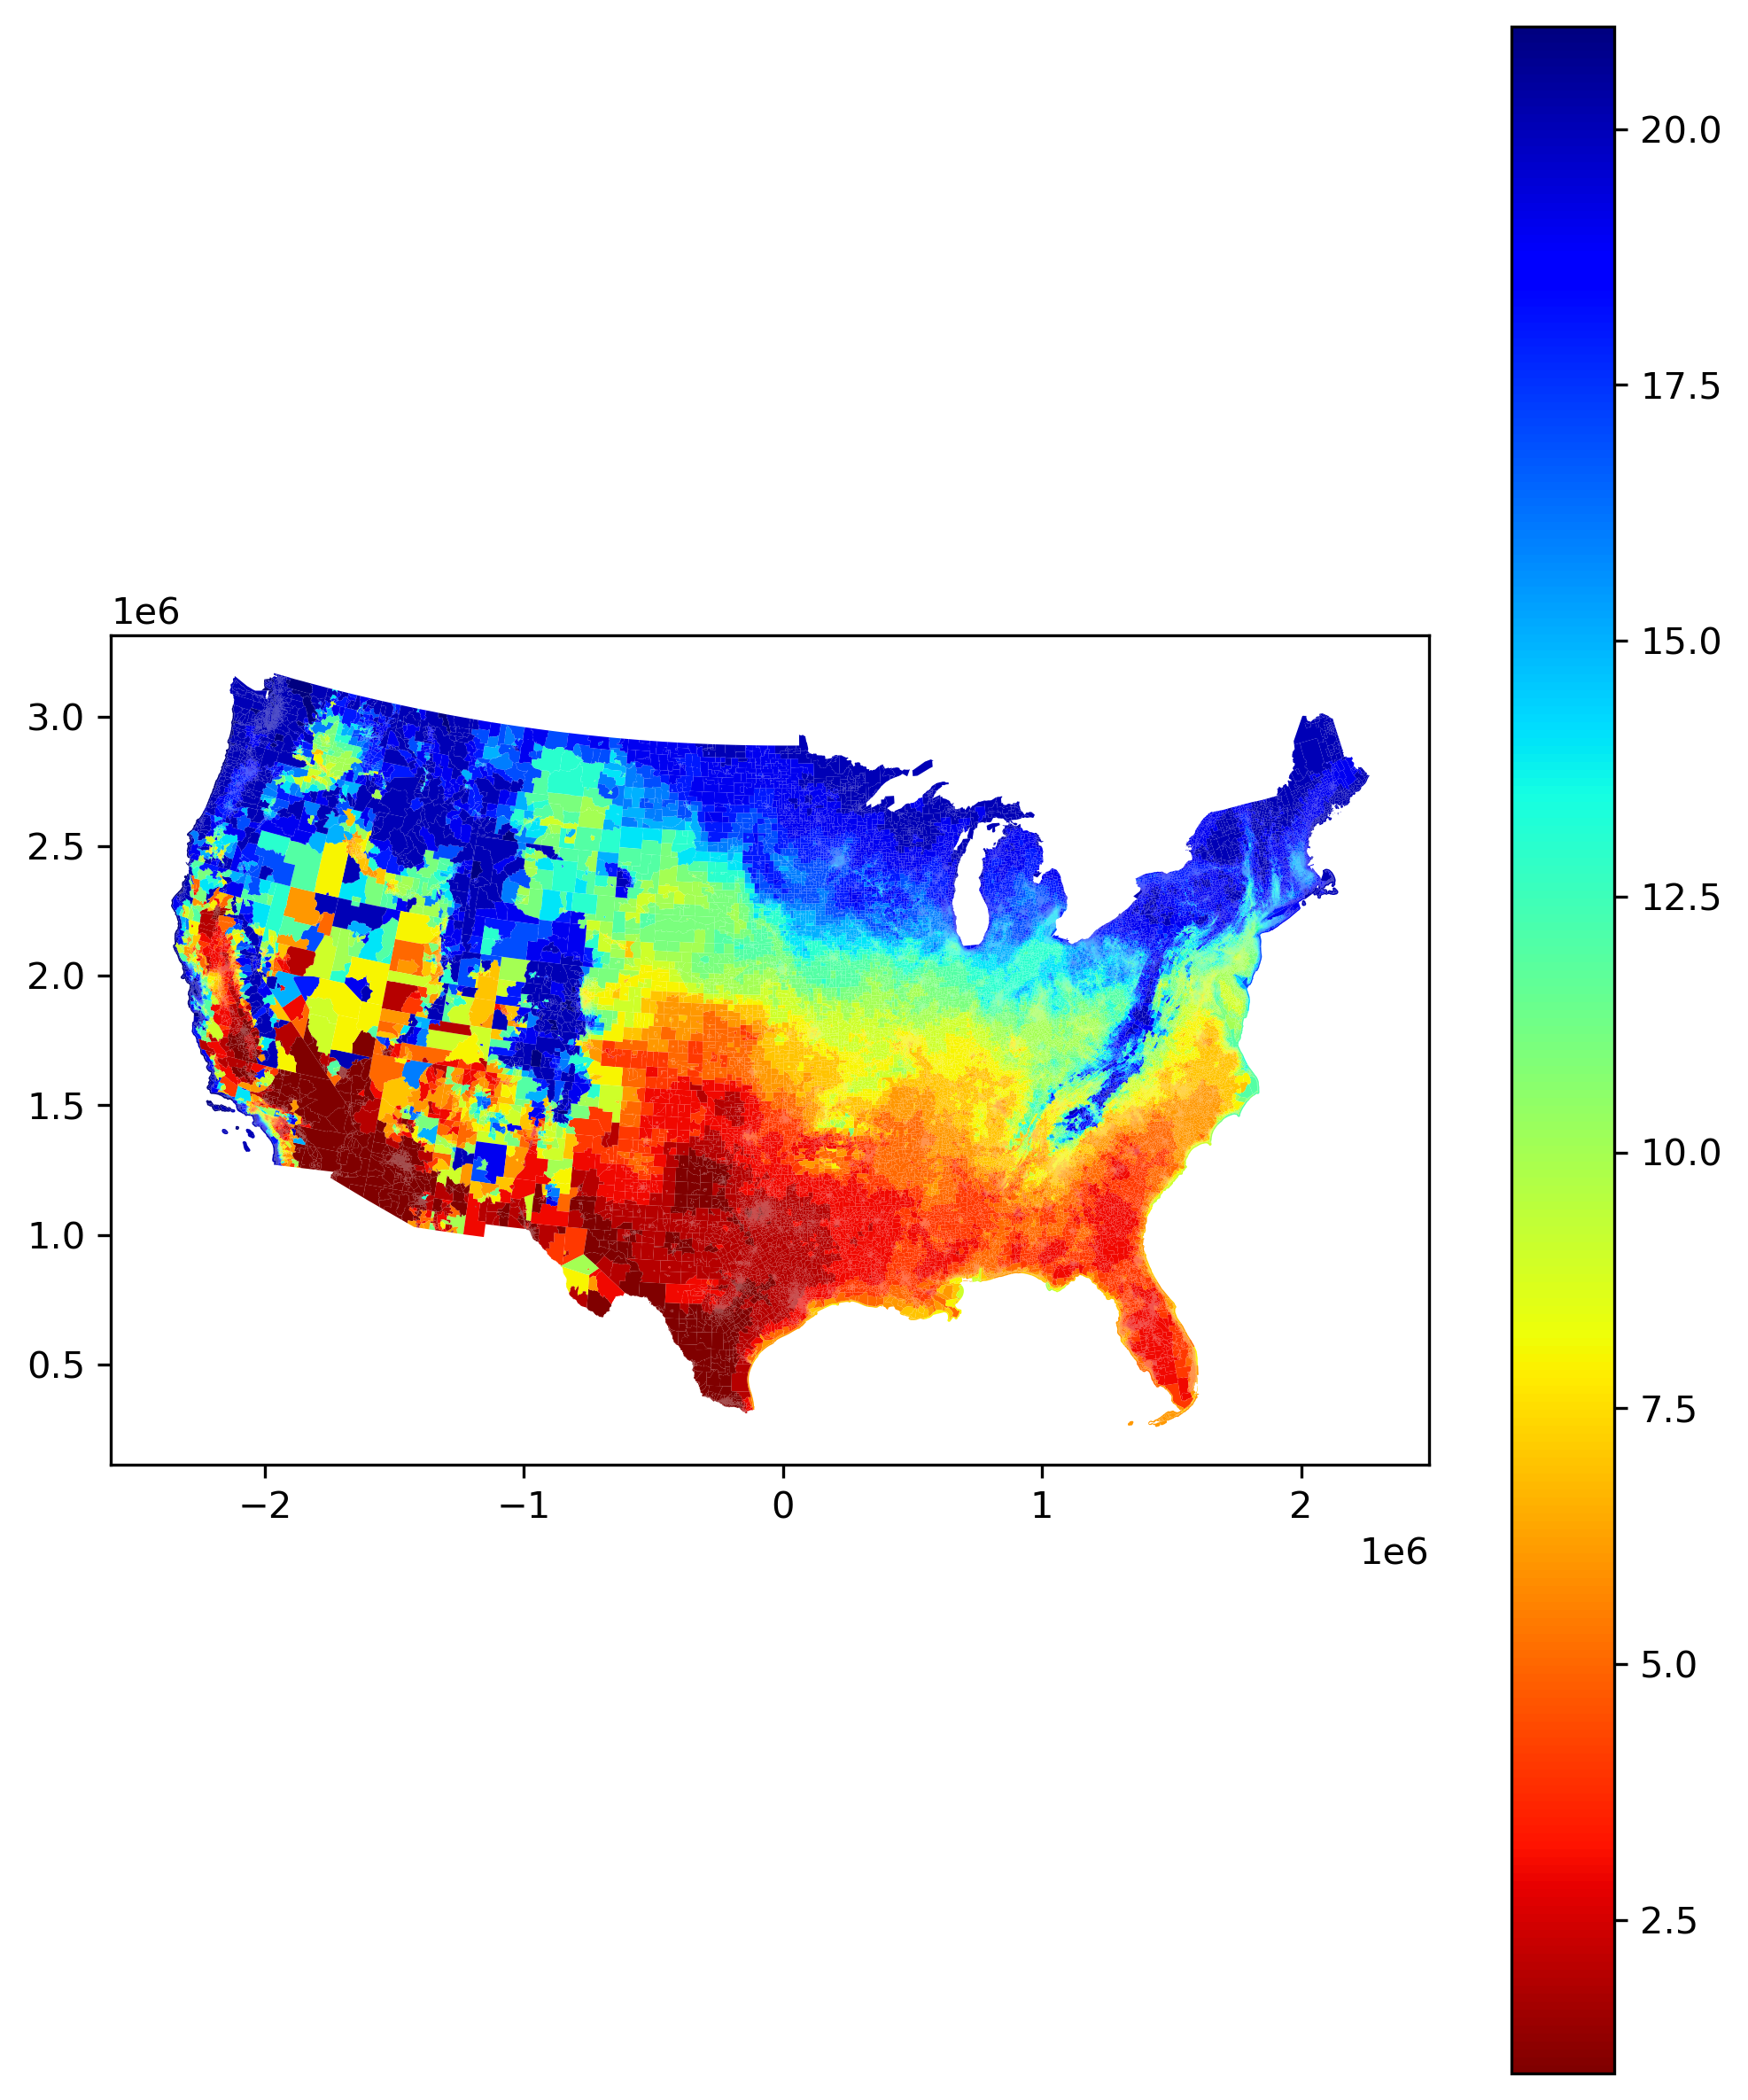

In [13]:
fig, ax1 = plt.subplots(figsize=(8, 10), dpi=300)
df.plot(ax=ax1, column='Temp_Ranke', cmap="jet_r", legend=True)

In [14]:
display(df[['D4A_proxtotransitstops', 'D4A_Ranked']].head(10))

,D4A_proxtotransitstops,D4A_Ranked
0,362.10,17.0
1,718.84,14.0
2,398.31,17.0
3,386.24,17.0
4,638.37,14.0
5,950.85,13.0
6,1165.43,13.0
7,442.57,16.0
8,280.29,18.0
9,619.60,15.0


In [15]:
df_az = df[(df.STATEFP == '04') & (df.COUNTYFP == '013')]

In [16]:
df = df[['GEOID20', 'D2B_employmentmix', 'D2A_employmenthouseholdmix', 'D3B_interesectiondensity', 'D4A_proxtotransitstops', 'D2A_Ranked', 'D2B_Ranked', 'D3B_Ranked', 'D4A_Ranked', 'NatWalkInd', 'AverageTem', 'ua_pop', 'ua_name', 'cbg_pop', 'acs_pop', 'land_area', 'TreeEquity', 'Temp_Ranke', 'TES_Ranked', 'Pop_Densit', 'Density_Ca', 'Shape_Leng', 'Shape_Area', 'geometry']]

In [17]:
df.columns

Index(['GEOID20', 'D2B_employmentmix', 'D2A_employmenthouseholdmix',
       'D3B_interesectiondensity', 'D4A_proxtotransitstops', 'D2A_Ranked',
       'D2B_Ranked', 'D3B_Ranked', 'D4A_Ranked', 'NatWalkInd', 'AverageTem',
       'ua_pop', 'ua_name', 'cbg_pop', 'acs_pop', 'land_area', 'TreeEquity',
       'Temp_Ranke', 'TES_Ranked', 'Pop_Densit', 'Density_Ca', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')

In [18]:
df_az.crs

<Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [20]:
df = df[['GEOID20', 'D2B_employmentmix', 'D2A_employmenthouseholdmix', 'D3B_interesectiondensity', 'D4A_proxtotransitstops', 'D2A_Ranked', 'D2B_Ranked', 'D3B_Ranked', 'D4A_Ranked', 'NatWalkInd', 'AverageTem', 'ua_pop', 'ua_name', 'cbg_pop', 'acs_pop', 'land_area', 'TreeEquity', 'Temp_Ranke', 'TES_Ranked', 'Pop_Densit', 'Density_Ca', 'Shape_Leng', 'Shape_Area', 'geometry']]

In [21]:
remove_ranked = ['D2A_Ranked', 'D2B_Ranked', 'D3B_Ranked', 'D4A_Ranked', 'Temp_Ranke', 'TES_Ranked', 'Shape_Leng', 'Shape_Area']

In [40]:
df_eda = df.drop(columns=remove_ranked)
df_eda = df_eda.replace(0, np.nan)
# df_eda = df_eda.dropna()

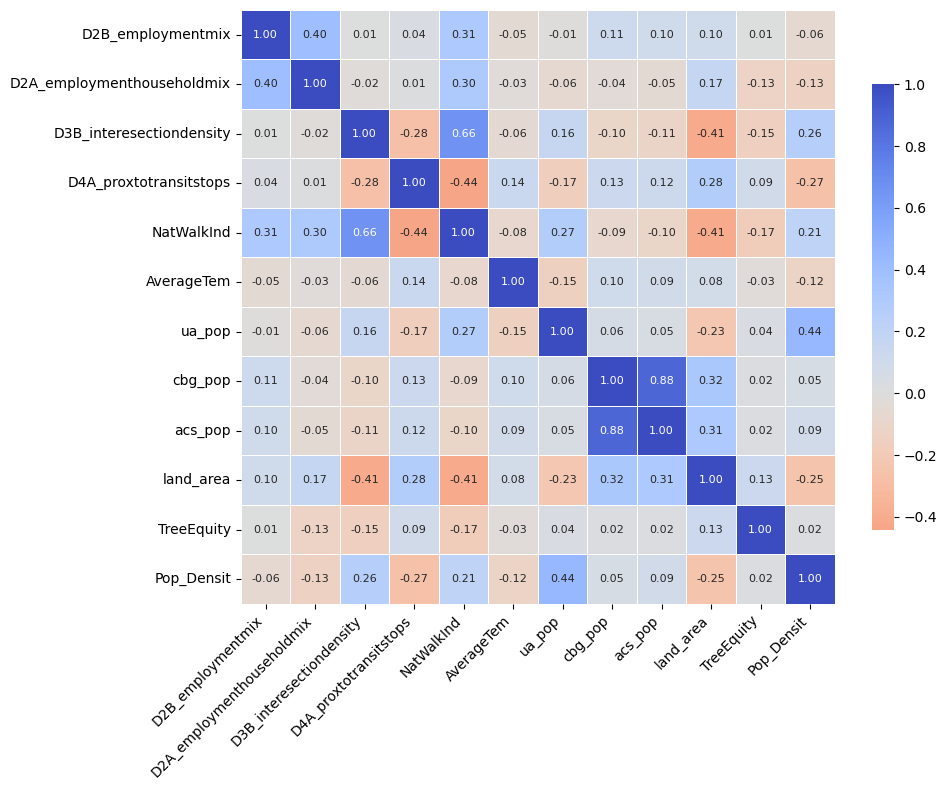

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_eda.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    cmap='coolwarm_r',
    square=True,
    cbar_kws={'shrink': 0.75},
    linewidths=0.5,
    annot_kws={'size': 8},
    center=0
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [28]:
df_eda.describe(include='all')

,GEOID20,D2B_employmentmix,D2A_employmenthouseholdmix,D3B_interesectiondensity,D4A_proxtotransitstops,NatWalkInd,AverageTem,ua_pop,ua_name,cbg_pop,acs_pop,land_area,TreeEquity,Pop_Densit,Density_Ca,geometry
count,90726,90726.000000,90726.000000,90726.000000,90726.000000,90726.000000,90726.000000,9.072600e+04,90726,90726.000000,90726.000000,90726.000000,90726.000000,90726.000000,90726,90726
unique,90726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,661,NaN,NaN,NaN,NaN,NaN,4,90726
top,481130078254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"New York--Jersey City--Newark, NY--NJ",NaN,NaN,NaN,NaN,NaN,Low,"POLYGON ((-68983.31590000167 1091325.7336, -68..."
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11281,NaN,NaN,NaN,NaN,NaN,43184,1
mean,NaN,0.534686,0.499763,124.679142,450.787783,13.829292,29.224110,4.234919e+06,NaN,1389.145140,1387.845381,0.781775,84.828417,5017.341577,NaN,NaN
std,NaN,0.216372,0.228075,88.655763,277.945545,2.319986,3.578783,4.277078e+06,NaN,619.807016,687.459151,1.062181,12.474676,8997.341676,NaN,NaN
min,NaN,-0.000000,0.000000,0.000000,0.000000,5.000000,15.813700,2.185000e+03,NaN,0.000000,0.000000,0.001400,11.000000,0.000000,NaN,NaN
25%,NaN,0.403533,0.322110,71.066231,241.400000,12.166667,27.020200,7.762560e+05,NaN,961.000000,911.000000,0.263900,77.000000,1341.270000,NaN,NaN
50%,NaN,0.574882,0.513185,108.714561,396.970000,13.833333,28.667750,2.526853e+06,NaN,1286.000000,1275.000000,0.507400,87.000000,2486.975000,NaN,NaN
75%,NaN,0.700816,0.680409,156.456211,616.920000,15.500000,31.343450,6.077522e+06,NaN,1700.000000,1740.000000,0.909475,95.000000,4810.950000,NaN,NaN


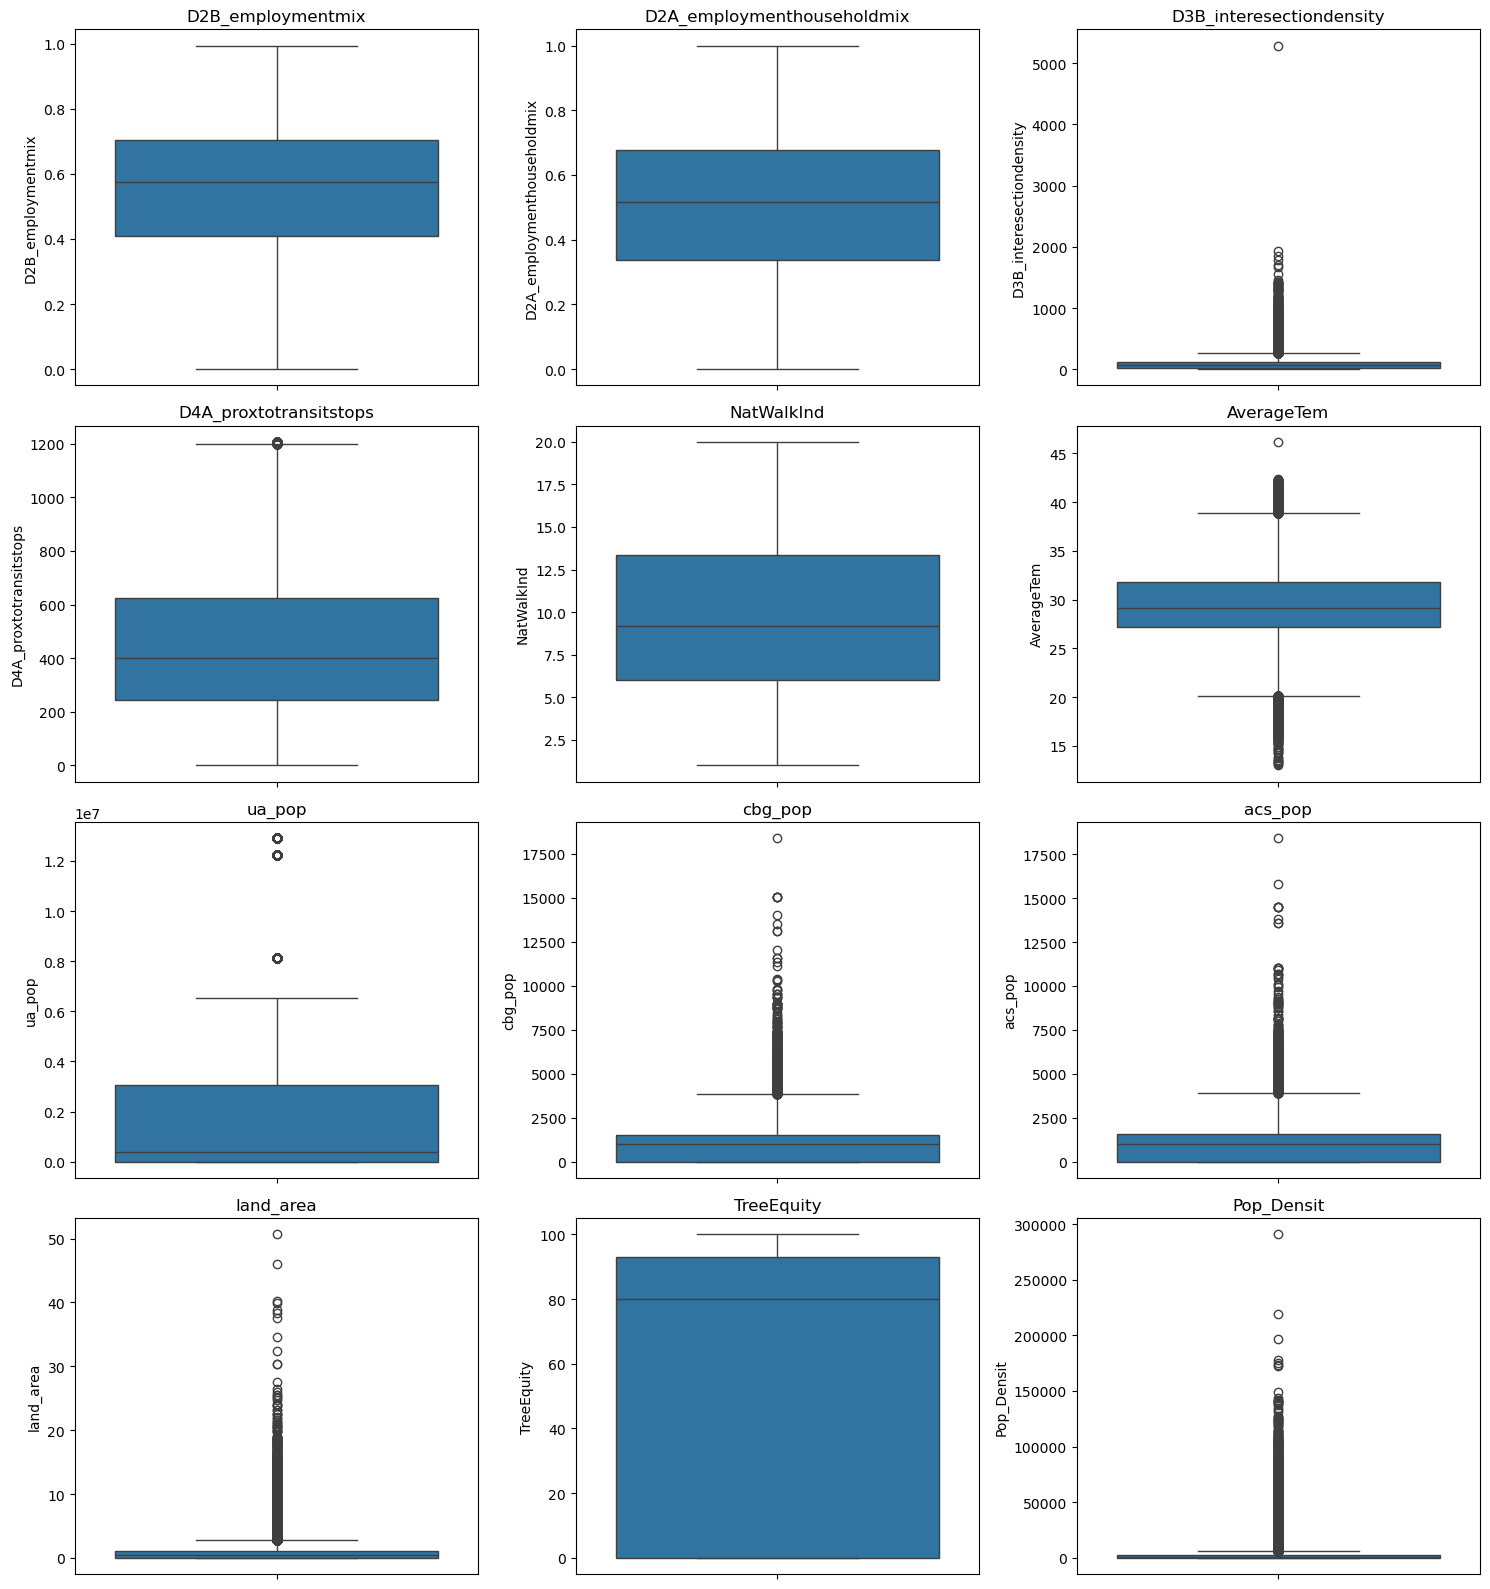

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

numeric_cols = df_eda.select_dtypes(include='number').columns
n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()  # Flatten to iterate easily

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
